# Pairs trading. Pairs selection. Cointegration (part 1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Cointegration example

In [62]:
# generate random walk process
np.random.seed(112)
F = [15]
for i in range(252):
    F.append(F[i] + np.random.randn())
F = np.array(F)

# generate price series
P_a = 1.5*F + np.random.randn(len(F))
P_b = 0.5*F + np.random.randn(len(F))

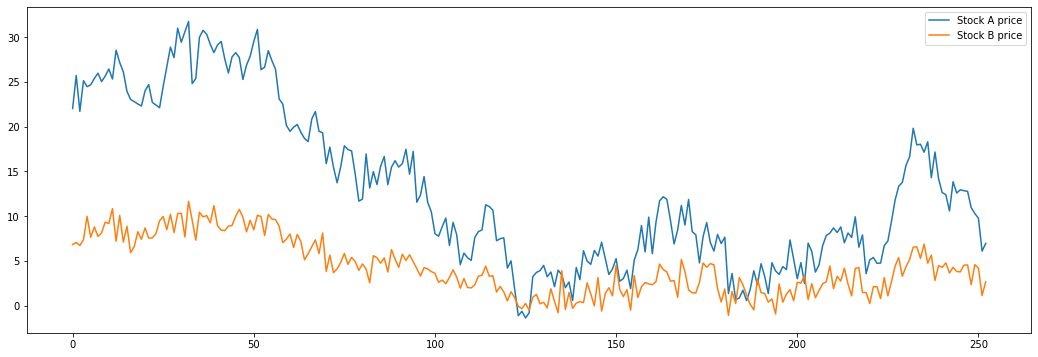

In [63]:
# plot prices
plt.figure(figsize=(18,6))
plt.plot(P_a, label='Stock A price')
plt.plot(P_b, label='Stock B price')
plt.legend()

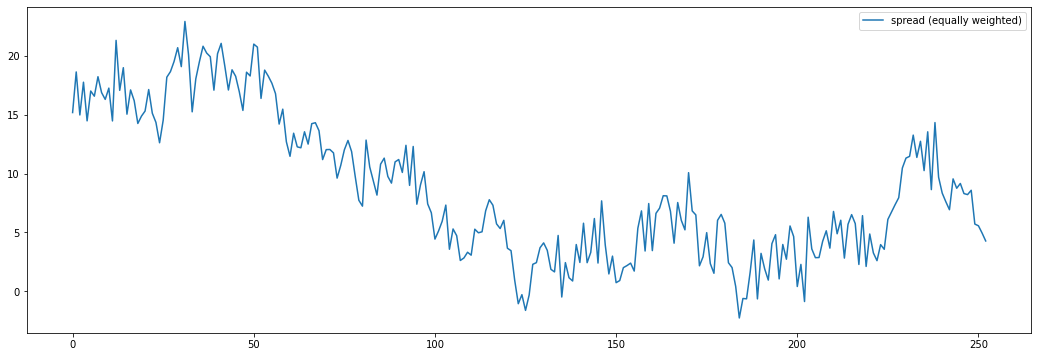

In [64]:
# plot spread (equally weighted positions)
spread_ew = P_a - P_b
plt.figure(figsize=(18,6))
plt.plot(spread_ew, label='spread (equally weighted)')
plt.legend()

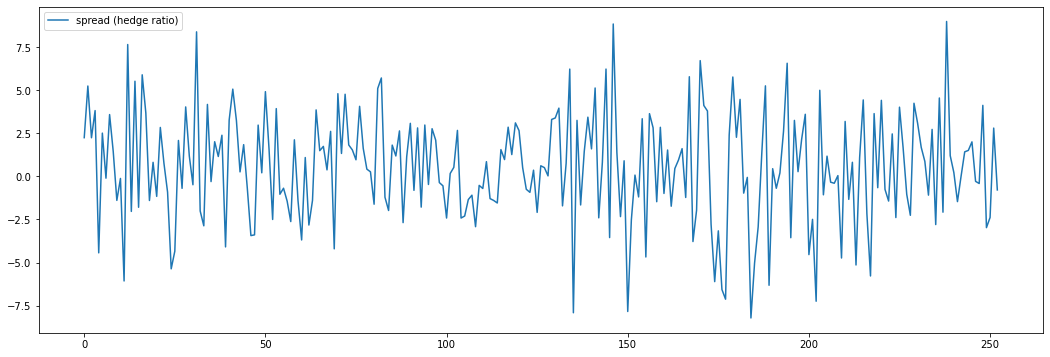

In [67]:
from statsmodels.regression.linear_model import OLS

# calculate hedge ratio
res = OLS(P_a, P_b).fit()
hedge_ratio = res.params[0]

# create portfolio using calculated ratio
spread_hr = P_a - hedge_ratio*P_b

plt.figure(figsize=(18,6))
plt.plot(spread_hr, label='spread (hedge ratio)')
plt.legend()

In [68]:
from statsmodels.tsa.stattools import coint

coint(P_a, P_b)

(-5.995727015051173,
 1.658313767794149e-06,
 array([-3.94042787, -3.36048387, -3.06132299]))

# Load data

In [2]:
# read prices from csv file
prices = pd.read_csv('vbr16_19.csv', index_col='Date')

In [3]:
prices

,IEX,NUAN,MOH,NVAX,SBNY,PWR,WSM,FANG,BRO,STLD,...,RES,LE,APEI,FF,WK,PKI,ALGT,SAGE,OII,DRQ
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-01,76.976616,13.567100,49.830002,149.800003,116.435783,22.887882,45.972996,85.069756,17.572161,21.910513,...,14.904593,16.760000,28.219999,5.362969,13.470000,51.718643,138.262650,31.100000,29.461021,59.099998
2016-07-05,75.590309,13.134199,48.240002,144.600006,113.829865,22.759472,44.250740,84.120781,17.387442,21.884090,...,14.506883,16.330000,26.690001,5.353037,13.450000,51.119549,134.303772,31.280001,28.251621,56.540001
2016-07-06,76.311562,13.151515,48.669998,149.199997,115.586044,23.174353,44.882534,85.032166,17.486902,22.482931,...,14.459538,16.100000,27.570000,5.372900,13.400000,51.512394,135.205246,32.320000,28.464476,56.830002
2016-07-07,76.798637,13.376623,48.959999,149.199997,117.115601,23.371920,44.666168,83.237549,17.425331,22.755930,...,14.345906,16.170000,27.799999,5.333174,13.560000,51.649891,135.381775,32.160000,28.396748,56.889999
2016-07-08,78.540871,13.722944,50.209999,152.399994,119.003944,24.063398,46.855759,83.773125,17.685837,23.460453,...,14.648921,16.700001,28.629999,5.556631,13.860000,52.985580,137.705048,33.970001,28.812782,57.150002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,170.038528,18.010000,136.649994,4.000000,131.962463,40.950520,70.886360,84.531479,38.795483,32.447666,...,5.050000,17.809999,27.330000,7.557316,41.470001,96.798271,179.097549,74.639999,15.090000,47.389999
2019-12-24,168.596710,18.000000,136.240005,4.000000,132.428436,40.712379,70.472260,85.623375,38.637653,32.664612,...,5.030000,17.580000,27.430000,7.600537,42.009998,97.037254,179.187057,76.800003,15.140000,47.410000
2019-12-26,169.420593,18.049999,136.380005,4.000000,133.185608,40.920746,71.271553,86.696274,38.834934,32.721199,...,5.110000,18.295000,27.910000,7.705499,41.740002,96.758453,177.973587,74.160004,15.090000,47.840000


In [4]:
cumret = np.log(prices).diff().cumsum()+1 # calculate cumulative returns
cumret.dropna(inplace=True) 

# Functions to calculate different metrics

In [5]:
def parse_pair(pair):
    '''
    parse pair string S1-S2
    return tickers S1, S2
    '''
    dp = pair.find('-')
    s1 = pair[:dp]
    s2 = pair[dp+1:]
    
    return s1,s2

def cadf_pvalue(s1, s2, cumret):
    '''
    perform CADF cointegration tests
    since it is sensitive to the order of stocks in the pair, perform both tests (s1-2 and s2-s1)
    return the smallest p-value of two tests
    '''
    from statsmodels.tsa.stattools import coint
    
    p1 = coint(cumret[s1], cumret[s2])[1]
    p2 = coint(cumret[s2], cumret[s1])[1]
    
    return min(p1,p2)

def calculate_halflife(spread):
    '''
    calculate half-life of mean reversion of the spread
    '''
    from statsmodels.regression.linear_model import OLS
    from statsmodels.tools.tools import add_constant
    
    ylag = spread.shift()
    deltay = spread - ylag
    ylag.dropna(inplace=True)
    deltay.dropna(inplace=True)

    res = OLS(deltay, add_constant(ylag)).fit()
    halflife = -np.log(2)/res.params[0]
    
    return halflife

def calculate_metrics(pairs, cumret, pairs_df):
    '''
    calculate metrics for pairs using data in cumret
    return dataframe of results
    '''
    from hurst import compute_Hc
    from statsmodels.tsa.stattools import adfuller
    from statsmodels.regression.linear_model import OLS
    from statsmodels.tools.tools import add_constant
    from statsmodels.tsa.stattools import coint
    
    cols = ['Euclidean distance', 'CADF p-value', 'ADF p-value', 'Spread SD', 'Pearson r',
        'Num zero-crossings', 'Hurst Exponent', 'Half-life of mean reversion', '% days within historical 2-SD band']
    results = pd.DataFrame(index=pairs, columns=cols)
    
    for pair in pairs:
        s1,s2 = parse_pair(pair)
        hedge_ratio = pairs_df.loc[pair]['Hedge ratio']
        spread = cumret[s1] - hedge_ratio*cumret[s2]
        results.loc[pair]['Euclidean distance'] = np.sqrt(np.sum((spread)**2))
        results.loc[pair]['CADF p-value'] = coint(cumret[s1], cumret[s2])[1]
        results.loc[pair]['ADF p-value'] = adfuller(spread)[1]
        hist_mu = pairs_df.loc[pair]['Spread mean'] # historical mean
        hist_sd = pairs_df.loc[pair]['Spread SD'] # historical standard deviation
        results.loc[pair]['Spread SD'] = hist_sd
        results.loc[pair]['Pearson r'] = np.corrcoef(cumret[s1], cumret[s2])[0][1]
        spread_nc = spread - hist_mu # subtract the mean to calculate number of crossing
        results.loc[pair]['Num zero-crossings'] = ((spread_nc[1:].values * spread_nc[:-1].values) < 0).sum()
        results.loc[pair]['Hurst Exponent'] = compute_Hc(spread)[0]
        results.loc[pair]['Half-life of mean reversion'] = calculate_halflife(spread)
        results.loc[pair]['% days within historical 2-SD band'] = (abs(spread-hist_mu) < 2*hist_sd).sum() / len(spread) * 100
        
    return results

def plot_pairs(pairs, cumret_train, cumret_test):
    '''
    plot cumulative returns of the spread for each pair in pairs
    '''
    
    from statsmodels.regression.linear_model import OLS
    from statsmodels.tools.tools import add_constant
    
    for pair in pairs:
        s1,s2 = parse_pair(pair)
        res = OLS(cumret_train[s1], add_constant(cumret_train[s2])).fit()
        spread_train = cumret_train[s1] - res.params[s2]*cumret_train[s2]
        spread_test = cumret_test[s1] - res.params[s2]*cumret_test[s2]
        spread_mean = spread_train.mean() # historical mean
        spread_std = spread_train.std() # historical standard deviation

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,4))
        fig.suptitle(f'Spread of {pair} pair', fontsize=16)
        ax1.plot(spread_train, label='spread')
        ax1.set_title('Formation period')
        ax1.axhline(y=spread_mean, color='g', linestyle='dotted', label='mean')
        ax1.axhline(y=spread_mean+2*spread_std, color='r', linestyle='dotted', label='2-SD band')
        ax1.axhline(y=spread_mean-2*spread_std, color='r', linestyle='dotted')
        ax1.legend()
        ax2.plot(spread_test, label='spread')
        ax2.set_title('Trading period')
        ax2.axhline(y=spread_mean, color='g', linestyle='dotted', label='mean')
        ax2.axhline(y=spread_mean+2*spread_std, color='r', linestyle='dotted', label='2-SD band')
        ax2.axhline(y=spread_mean-2*spread_std, color='r', linestyle='dotted')
        ax2.legend()
        
def select_pairs(train):
    '''
    select pairs using data from train dataframe
    return dataframe of selected pairs
    '''
    tested = []

    from statsmodels.regression.linear_model import OLS
    from statsmodels.tools.tools import add_constant
    from hurst import compute_Hc
    from statsmodels.tsa.stattools import adfuller
    from statsmodels.tsa.stattools import coint

    cols = ['Euclidean distance', 'Num zero-crossings', 'Pearson r', 'Spread mean', 
            'Spread SD', 'Hurst Exponent', 'Half-life of mean reversion', 'Hedge ratio']
    pairs = pd.DataFrame(columns=cols)

    for s1 in train.columns:
        for s2 in train.columns:
            if s1!=s2 and (f'{s1}-{s2}' not in tested):
                tested.append(f'{s1}-{s2}')
                cadf_p = coint(train[s1], train[s2])[1]
                if cadf_p<0.01 and (f'{s2}-{s1}' not in pairs.index): # stop if pair already added as s2-s1
                    res = OLS(train[s1], add_constant(train[s2])).fit()
                    hedge_ratio = res.params[s2]
                    if hedge_ratio > 0: # hedge ratio should be posititve
                        spread = train[s1] - hedge_ratio*train[s2]
                        hurst = compute_Hc(spread)[0]
                        if hurst<0.5:
                            halflife = calculate_halflife(spread)
                            if halflife>1 and halflife<30:
                                spread_nc = spread - spread.mean() # subtract the mean to calculate number of crossings
                                num_crossings = (spread_nc.values[1:] * spread_nc.values[:-1] < 0).sum()
                                if num_crossings>len(train.index)/252*12: 
                                    #distance = np.sqrt(np.sum((train[s1] - train[s2])**2)) # Euclidean distance
                                    distance = np.sqrt(np.sum(spread**2))
                                    pearson_r = np.corrcoef(train[s1], train[s2])[0][1]
                                    pairs.loc[f'{s1}-{s2}'] = [distance, num_crossings, pearson_r, spread.mean(),
                                                               spread.std(), hurst, halflife, hedge_ratio]
                                
    return pairs

## 12 months formation period \ 6 months trading period

In [6]:
# prepare data
cumret12_6 = cumret.loc['2018-07-01':]
cumret12_6 = cumret12_6 / cumret12_6.iloc[0] # divide by first row so that all prices start at 1
train12_6 = cumret12_6.loc['2018-07-01':'2019-06-31'] # formation period
test12_6 = cumret12_6.loc['2019-07-01':'2019-12-31'] # trading period

In [7]:
pairs12_6 = select_pairs(train12_6)

In [9]:
pairs12_6

,Euclidean distance,Num zero-crossings,Pearson r,Spread mean,Spread SD,Hurst Exponent,Half-life of mean reversion,Hedge ratio
IEX-CNMD,5.078681,39.0,0.919673,0.320623,0.019348,0.350847,5.545360,0.719791
NUAN-GPRO,15.915467,35.0,0.682158,1.005102,0.054690,0.489302,7.734184,0.184886
MOH-MIDD,11.540596,28.0,0.676203,0.728583,0.043764,0.365937,8.013367,0.379769
MOH-CORE,16.387635,20.0,0.639083,1.035442,0.045690,0.306873,8.737038,0.060249
MOH-AIN,4.256450,32.0,0.720492,0.266044,0.041194,0.288131,6.783260,0.810360
...,...,...,...,...,...,...,...,...
ALGT-CMO,0.797530,23.0,0.809393,0.002856,0.050460,0.269693,5.884354,1.019760
ALGT-BFS,3.585361,26.0,0.762527,-0.219867,0.055589,0.343470,5.324325,1.124844
SAGE-RS,0.496615,35.0,0.889236,0.004147,0.031196,0.371519,5.009532,0.978539
SAGE-THG,7.388119,33.0,0.842897,-0.465828,0.036695,0.384121,6.017058,1.419279


## Shortest distance

In [10]:
pairs12_6.sort_values(by='Euclidean distance')

,Euclidean distance,Num zero-crossings,Pearson r,Spread mean,Spread SD,Hurst Exponent,Half-life of mean reversion,Hedge ratio
CBSH-CVBF,0.275296,43.0,0.937440,0.012252,0.012396,0.386513,5.859113,0.995534
WD-HLI,0.276858,51.0,0.939909,0.007111,0.016033,0.361534,3.513848,1.015997
TOWN-WTFC,0.321711,30.0,0.970324,-0.013446,0.015301,0.305312,5.831519,0.998102
RLJ-TOWN,0.360433,36.0,0.942105,-0.001313,0.022804,0.347845,5.427389,1.012489
SIGI-ESE,0.388232,29.0,0.895136,-0.005857,0.023893,0.364638,7.684600,1.003682
...,...,...,...,...,...,...,...,...
NVAX-AWI,143.947001,27.0,0.906322,-9.094280,0.421589,0.328055,7.992412,9.586998
BBBY-RUSHA,180.854295,25.0,0.887711,-11.433424,0.332205,0.265727,6.046481,12.152590
ENDP-NPK,192.660390,34.0,0.918910,-12.179839,0.352300,0.290995,5.153778,13.762283
OMI-GBX,247.617721,22.0,0.972561,-15.651033,0.551852,0.264964,4.999778,15.809493


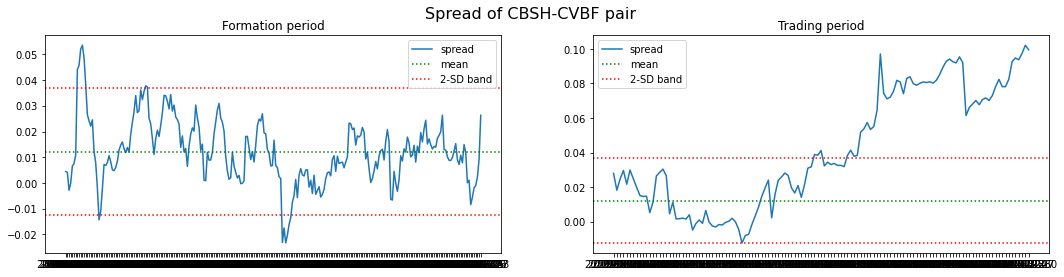

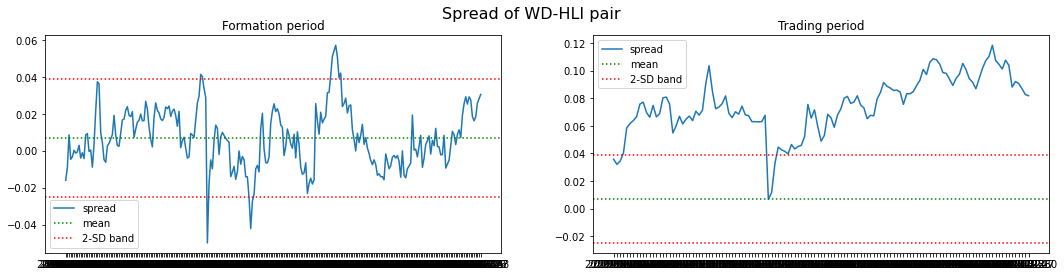

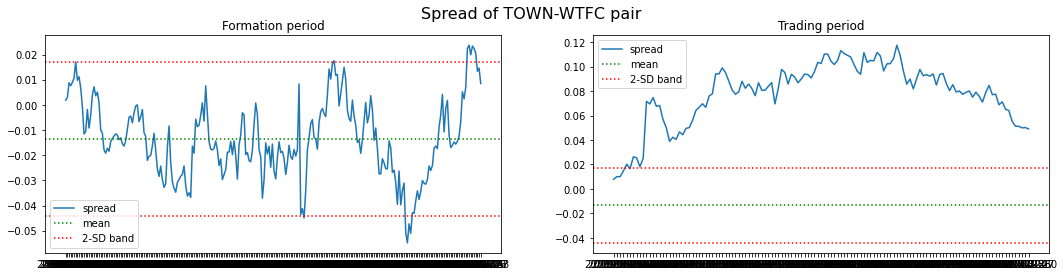

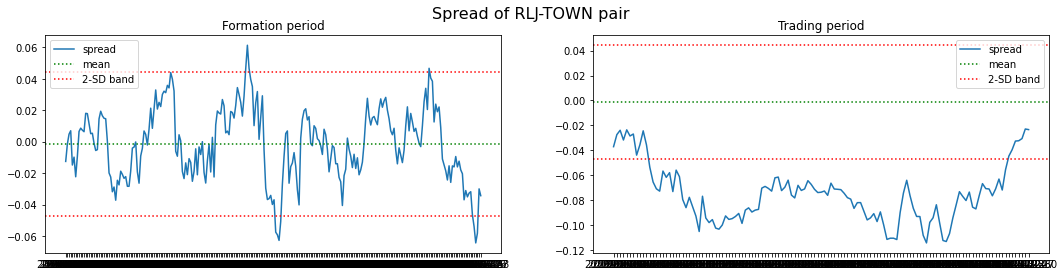

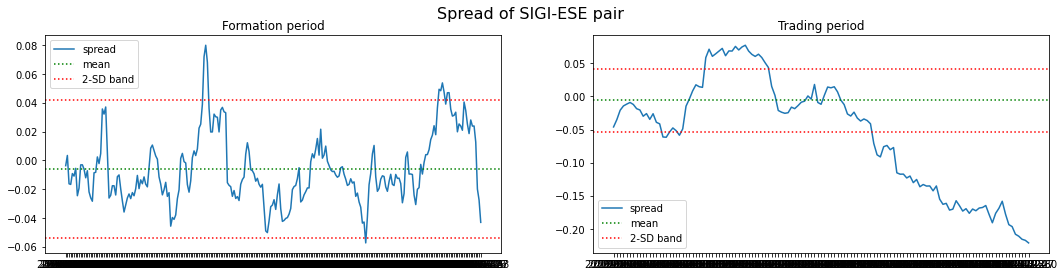

In [11]:
top5_distance = list(pairs12_6.sort_values(by='Euclidean distance').index[:5])
plot_pairs(top5_distance, train12_6, test12_6)

In [12]:
calculate_metrics(top5_distance, test12_6, pairs12_6)

,Euclidean distance,CADF p-value,ADF p-value,Spread SD,Pearson r,Num zero-crossings,Hurst Exponent,Half-life of mean reversion,% days within historical 2-SD band
CBSH-CVBF,0.606817,0.135194,0.870339,0.012396,0.818829,6,0.644354,60.359111,53.543307
WD-HLI,0.877424,0.030372,0.149426,0.016033,0.881213,2,0.428839,6.31375,4.724409
TOWN-WTFC,0.923075,0.400908,0.071547,0.015301,0.56771,0,0.534913,9.695196,3.937008
RLJ-TOWN,0.881442,0.543346,0.305254,0.022804,0.670467,0,0.424355,10.091432,14.173228
SIGI-ESE,1.141554,0.210221,0.975499,0.023893,-0.857814,6,0.658513,-101.590857,43.307087


## Highest number of zero crossings

In [13]:
pairs12_6.sort_values(by='Num zero-crossings', ascending=False)

,Euclidean distance,Num zero-crossings,Pearson r,Spread mean,Spread SD,Hurst Exponent,Half-life of mean reversion,Hedge ratio
PCH-WERN,6.546280,62.0,0.893696,-0.413034,0.028661,0.292854,3.079360,1.381646
SITC-SAGE,17.648734,59.0,0.878829,-1.113600,0.076352,0.311025,3.452021,2.062156
RYN-WERN,1.055545,59.0,0.803218,-0.059439,0.030453,0.426599,6.356487,0.993811
RPAI-ALGT,9.090179,58.0,0.793722,0.574169,0.029300,0.260594,3.263771,0.444950
UBA-ALGT,8.062314,56.0,0.854054,0.509236,0.026175,0.309224,3.396066,0.500143
...,...,...,...,...,...,...,...,...
DLX-EQT,7.963912,12.0,0.823410,0.496852,0.082832,0.400595,17.153326,0.421622
TRMK-GFF,12.168688,12.0,0.886462,0.769277,0.022867,0.397948,7.841209,0.268210
GBCI-CATY,11.115183,12.0,0.587811,0.702527,0.025444,0.473824,10.574117,0.376066
CMA-MDGL,7.006779,12.0,0.856508,0.442142,0.029892,0.395510,15.259674,0.595944


In [14]:
top5_crossings = list(pairs12_6.sort_values(by='Num zero-crossings', ascending=False).index[:5])

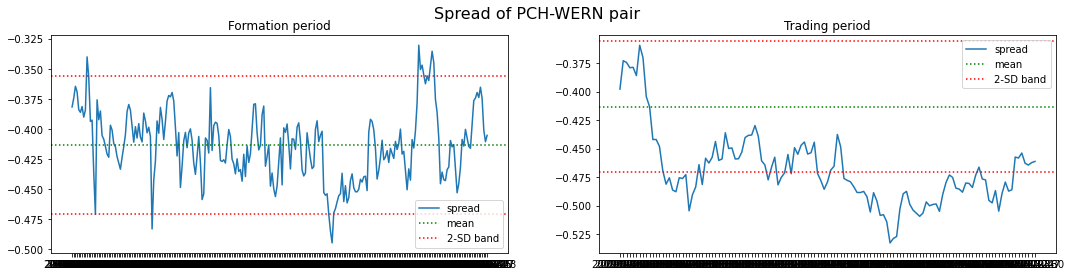

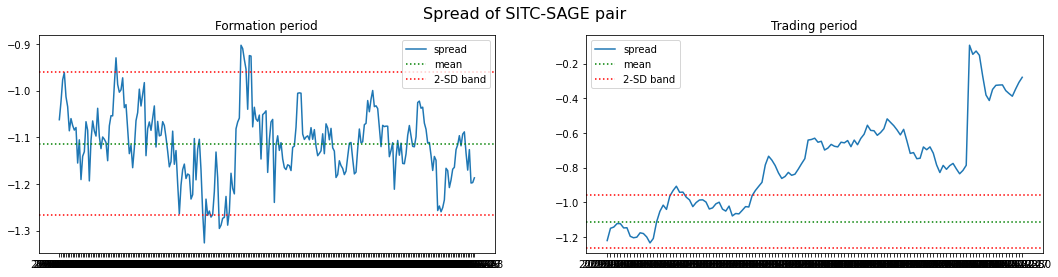

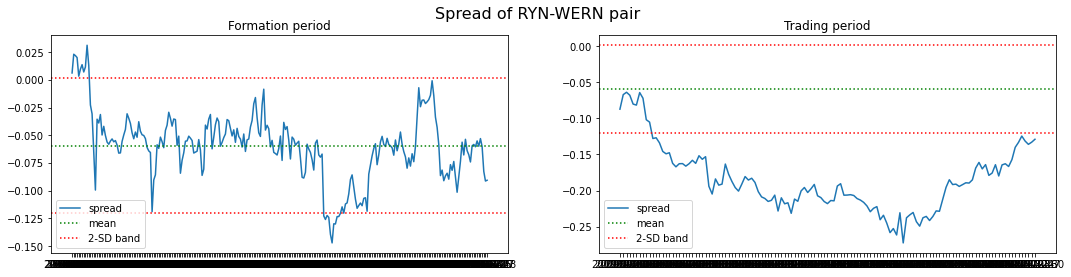

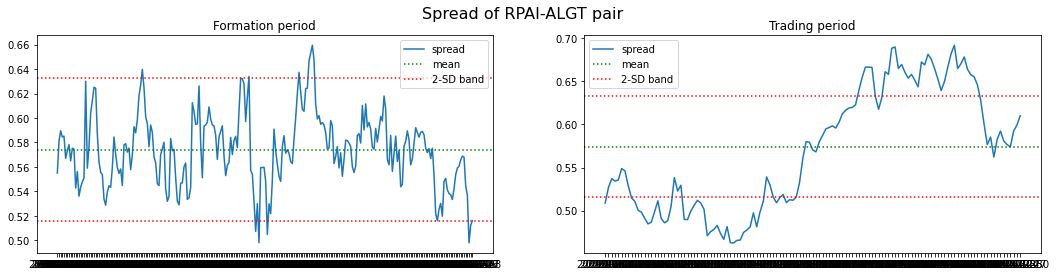

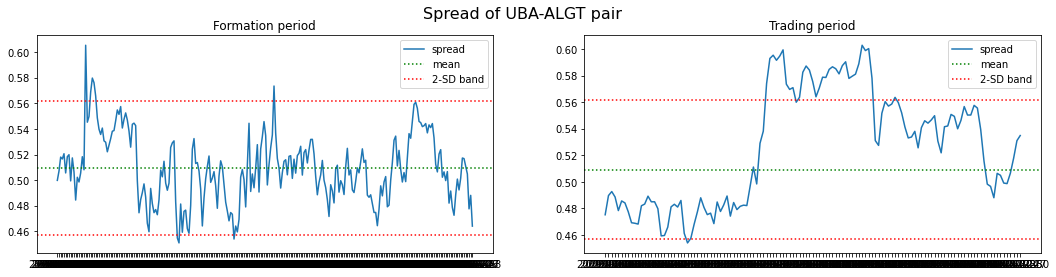

In [15]:
plot_pairs(top5_crossings, train12_6, test12_6)

In [16]:
calculate_metrics(top5_crossings, test12_6, pairs12_6)

,Euclidean distance,CADF p-value,ADF p-value,Spread SD,Pearson r,Num zero-crossings,Hurst Exponent,Half-life of mean reversion,% days within historical 2-SD band
PCH-WERN,5.28824,0.16875,0.069714,0.028661,0.89715,1,0.568487,7.697332,44.094488
SITC-SAGE,9.312954,0.618108,0.594288,0.076352,-0.095303,1,0.5733,20.984227,32.283465
RYN-WERN,2.143604,0.841544,0.161046,0.030453,0.5127,0,0.609521,14.277154,7.874016
RPAI-ALGT,6.471724,0.508292,0.7905,0.0293,0.888444,7,0.547832,35.185293,38.582677
UBA-ALGT,5.959066,0.539982,0.350092,0.026175,0.779318,5,0.532681,17.821604,73.228346


## Highest Pearson r

In [17]:
pairs12_6.sort_values(by='Pearson r', ascending=False)

,Euclidean distance,Num zero-crossings,Pearson r,Spread mean,Spread SD,Hurst Exponent,Half-life of mean reversion,Hedge ratio
TDS-USM,4.748471,48.0,0.984012,0.299802,0.017666,0.335650,4.191674,0.687840
PACW-HOMB,0.442583,41.0,0.981729,-0.022121,0.017186,0.324258,5.114590,1.016300
BXMT-PMT,2.817471,52.0,0.979720,0.178022,0.007819,0.267642,2.343333,0.839550
AA-NOV,4.793459,52.0,0.979613,0.301968,0.026965,0.396287,4.032034,0.632285
HOMB-TOWN,5.153176,30.0,0.978838,-0.325428,0.017853,0.338511,4.536087,1.349551
...,...,...,...,...,...,...,...,...
UGI-PRI,16.251064,36.0,0.003335,1.027557,0.022756,0.339930,5.833015,0.001574
GBCI-CSL,16.793826,34.0,0.002132,1.061671,0.031451,0.409926,10.691928,0.000616
GBCI-BXMT,16.792541,34.0,0.000856,1.061590,0.031451,0.409823,10.688329,0.000690
UGI-BIG,16.276986,36.0,0.000751,1.029196,0.022756,0.339527,5.827919,0.000088


In [18]:
top5_pearson = list(pairs12_6.sort_values(by='Pearson r', ascending=False).index[:5])

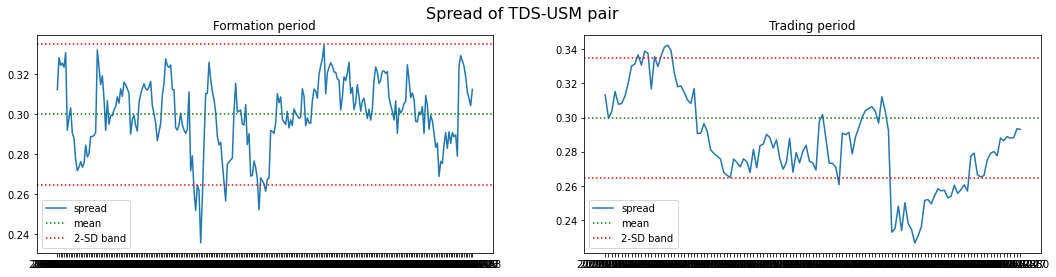

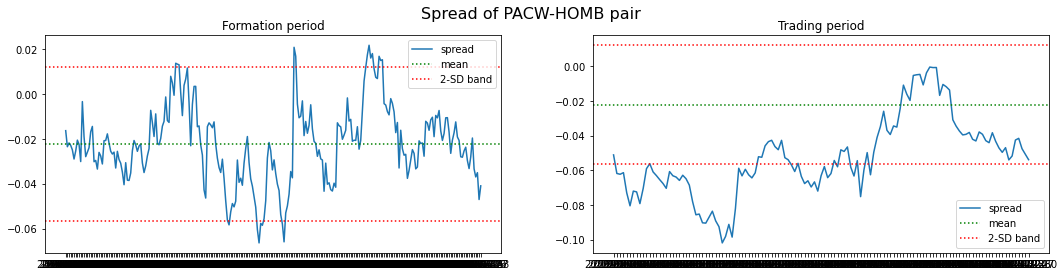

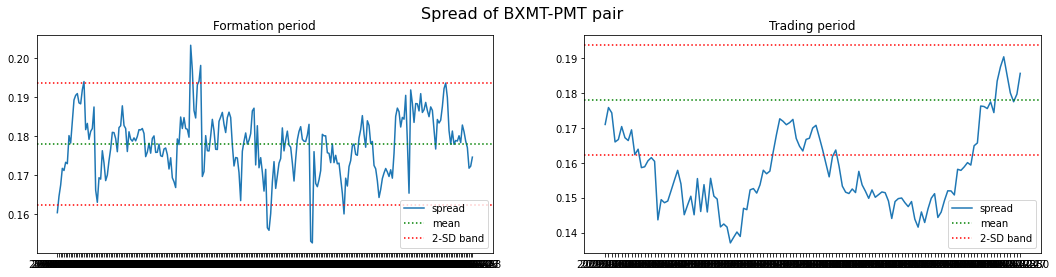

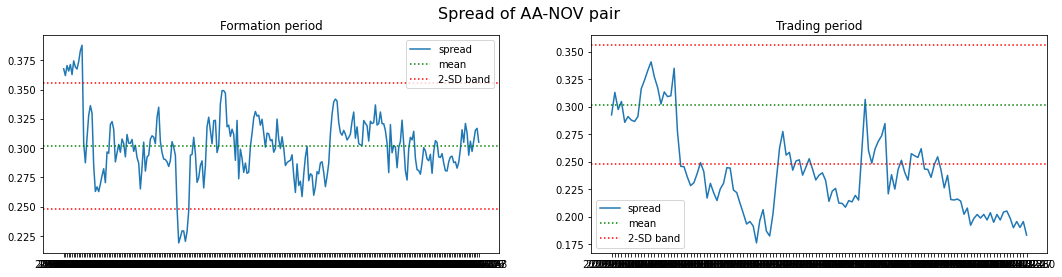

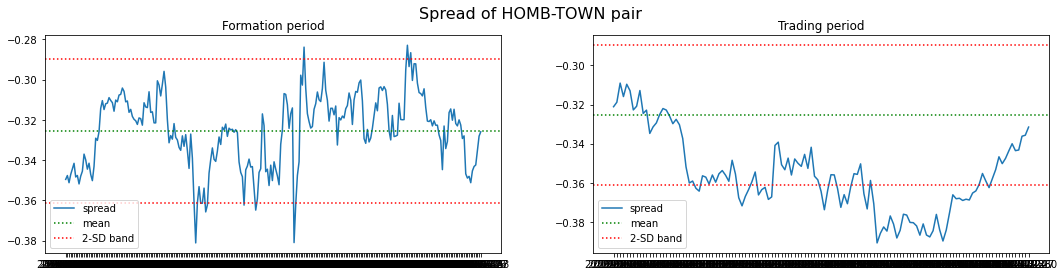

In [19]:
plot_pairs(top5_pearson, train12_6, test12_6)

In [20]:
calculate_metrics(top5_pearson, test12_6, pairs12_6)

,Euclidean distance,CADF p-value,ADF p-value,Spread SD,Pearson r,Num zero-crossings,Hurst Exponent,Half-life of mean reversion,% days within historical 2-SD band
TDS-USM,3.226929,0.026776,0.16975,0.017666,0.987352,9,0.492293,8.882104,74.015748
PACW-HOMB,0.643755,0.531204,0.365124,0.017186,0.838157,2,0.481843,14.305091,52.755906
BXMT-PMT,1.785318,0.342681,0.159534,0.007819,0.809057,3,0.430313,13.320119,33.070866
AA-NOV,2.742309,0.381504,0.177823,0.026965,0.628192,8,0.473639,8.459066,33.858268
HOMB-TOWN,4.017929,0.393915,0.219072,0.017853,0.760925,3,0.490381,10.340188,57.480315


## 36 months formation period \ 6 months trading period

In [21]:
# prepare data
cumret36_6 = cumret.loc['2016-07-01':]
cumret36_6 = cumret36_6 / cumret36_6.iloc[0] # divide by first row so that all prices start at 1
train36_6 = cumret36_6.loc['2016-07-01':'2019-06-31'] # formation period
test36_6 = cumret36_6.loc['2019-07-01':'2019-12-31'] # trading period

In [22]:
pairs36_6 = select_pairs(train36_6)

In [23]:
pairs36_6

,Euclidean distance,Num zero-crossings,Pearson r,Spread mean,Spread SD,Hurst Exponent,Half-life of mean reversion,Hedge ratio
IEX-WTRG,14.144494,66.0,0.884017,-0.506094,0.099642,0.484466,17.565892,1.956274
IEX-WRLD,13.741946,50.0,0.957005,0.497293,0.061831,0.370805,15.621250,0.559448
NUAN-CXW,23.945024,42.0,0.590243,0.870551,0.067820,0.395403,17.434368,0.248202
MOH-DECK,4.890974,48.0,0.940827,0.119716,0.132295,0.357488,22.901431,1.009714
PWR-NCLH,16.004716,61.0,0.777443,0.579093,0.072698,0.413033,20.680678,0.666258
...,...,...,...,...,...,...,...,...
KRO-VAC,6.952746,51.0,0.923001,-0.186133,0.172269,0.466469,21.838402,1.779684
ALGT-SBNY,3.539012,74.0,0.764231,0.104947,0.075158,0.346171,15.569417,0.833889
SAGE-WTRG,59.496212,64.0,0.806599,-2.148353,0.303119,0.473166,21.884967,4.294153
SAGE-THG,30.691554,54.0,0.928362,-1.102879,0.190598,0.392825,17.515307,2.592024


## Shortest distance

In [24]:
pairs36_6.sort_values(by='Euclidean distance')

,Euclidean distance,Num zero-crossings,Pearson r,Spread mean,Spread SD,Hurst Exponent,Half-life of mean reversion,Hedge ratio
ASB-FMBI,1.046008,43.0,0.957451,0.014786,0.035185,0.381178,17.414290,1.035419
AIT-HTLF,1.120165,70.0,0.961289,0.003033,0.040763,0.281898,10.046377,0.985461
BXS-CVBF,1.179994,52.0,0.948924,0.020159,0.038041,0.361294,27.249503,0.984644
CUZ-MFA,1.222380,68.0,0.906777,-0.020664,0.039523,0.332672,13.419899,1.042344
AUB-BRKL,1.272535,59.0,0.966178,0.031237,0.034340,0.347155,13.228060,0.976600
...,...,...,...,...,...,...,...,...
SRCL-SLG,63.765490,50.0,0.758708,-2.320456,0.149924,0.401372,19.169211,2.866306
ITGR-ARI,77.224185,47.0,0.951066,-2.812842,0.135027,0.440288,18.183255,3.386828
TRTN-AGNC,79.068658,63.0,0.883368,-2.878515,0.166801,0.426157,20.731292,4.144916
OMI-MATW,84.532276,75.0,0.940308,-3.073151,0.241017,0.416044,18.083858,3.398236


In [25]:
top5_distance = list(pairs36_6.sort_values(by='Euclidean distance').index[:5])

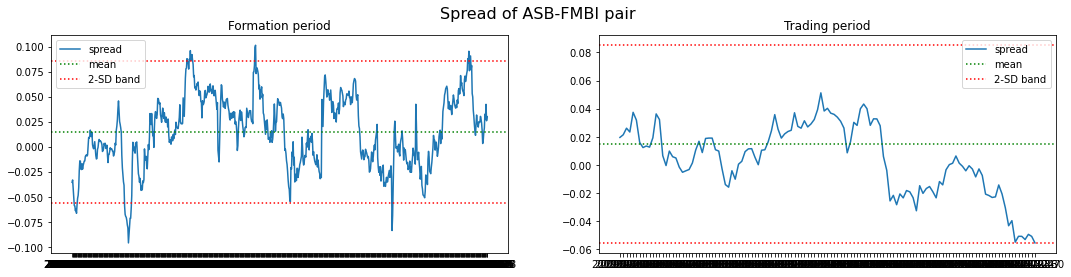

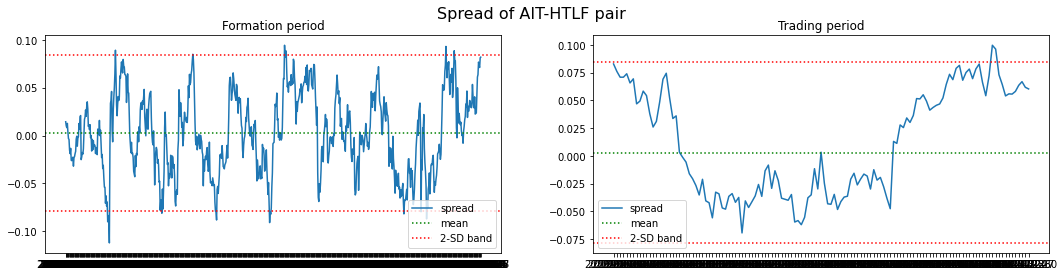

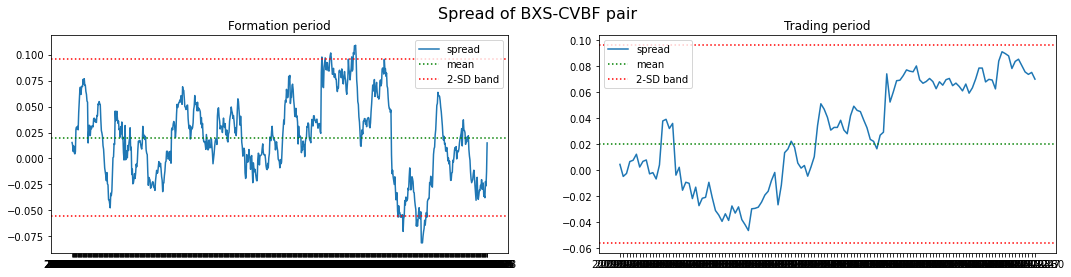

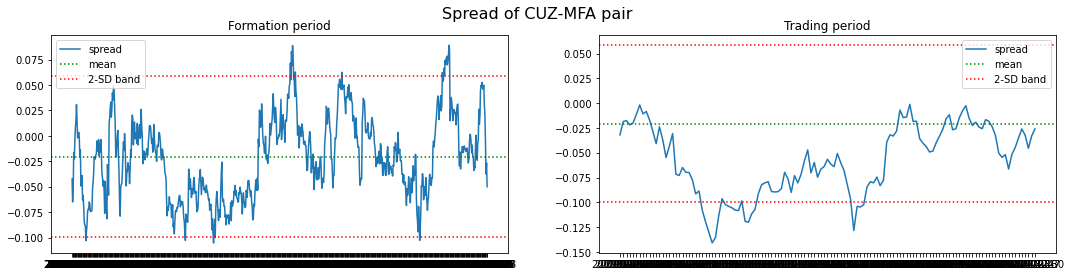

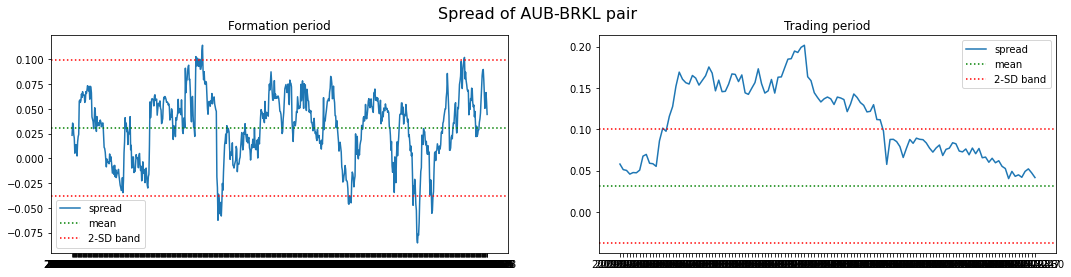

In [26]:
plot_pairs(top5_distance, train36_6, test36_6)

In [27]:
calculate_metrics(top5_distance, test36_6, pairs36_6)

,Euclidean distance,CADF p-value,ADF p-value,Spread SD,Pearson r,Num zero-crossings,Hurst Exponent,Half-life of mean reversion,% days within historical 2-SD band
ASB-FMBI,0.282693,0.157221,0.732936,0.035185,0.953757,11,0.441587,22.475678,100.0
AIT-HTLF,0.556303,0.257836,0.51889,0.040763,0.853593,4,0.512721,15.677792,98.425197
BXS-CVBF,0.546494,0.113561,0.627316,0.038041,0.829352,7,0.559758,23.19636,100.0
CUZ-MFA,0.760662,0.272362,0.355646,0.039523,0.874175,14,0.431914,12.631201,85.03937
AUB-BRKL,1.350646,0.115545,0.694918,0.03434,0.630989,0,0.598048,28.388287,48.031496


## Highest number of zero crossings

In [28]:
pairs36_6.sort_values(by='Num zero-crossings', ascending=False)

,Euclidean distance,Num zero-crossings,Pearson r,Spread mean,Spread SD,Hurst Exponent,Half-life of mean reversion,Hedge ratio
VAC-PCH,23.103974,101.0,0.941013,-0.838849,0.078565,0.323529,9.762199,1.719818
BXS-SHO,1.654118,99.0,0.924576,-0.039128,0.045937,0.310011,10.549316,1.095930
MDU-BRKL,15.682875,99.0,0.877249,0.571172,0.028773,0.281378,8.233573,0.399129
ROIC-APOG,17.955836,99.0,0.645440,0.653168,0.045977,0.393306,17.276432,0.256974
BRO-CVI,17.702676,95.0,0.978097,0.644480,0.037188,0.314274,11.577108,0.387476
...,...,...,...,...,...,...,...,...
IDCC-HOMB,18.884913,36.0,0.694518,0.684746,0.073382,0.431202,21.090263,0.567227
SCL-WWD,21.748196,36.0,0.721578,0.790147,0.068134,0.427121,19.076606,0.439033
CMA-HII,5.442141,36.0,0.896699,-0.169108,0.103928,0.440151,20.924295,1.526436
COLB-ECPG,25.439186,36.0,0.764686,0.924672,0.074589,0.478208,23.029841,0.346765


In [29]:
top5_crossings = list(pairs36_6.sort_values(by='Num zero-crossings', ascending=False).index[:5])

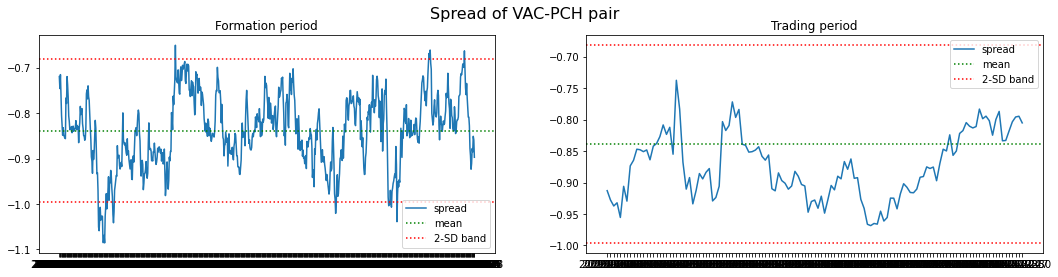

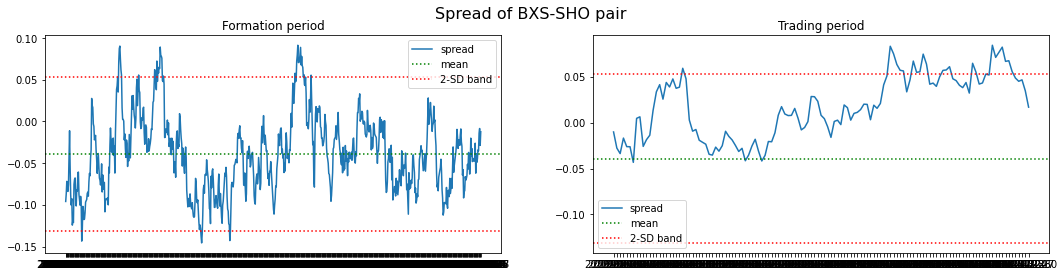

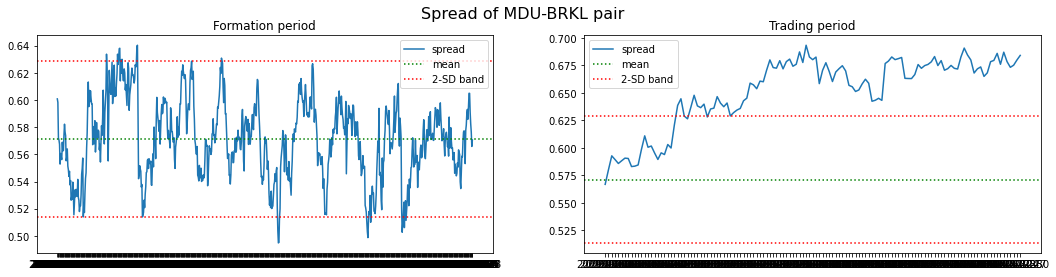

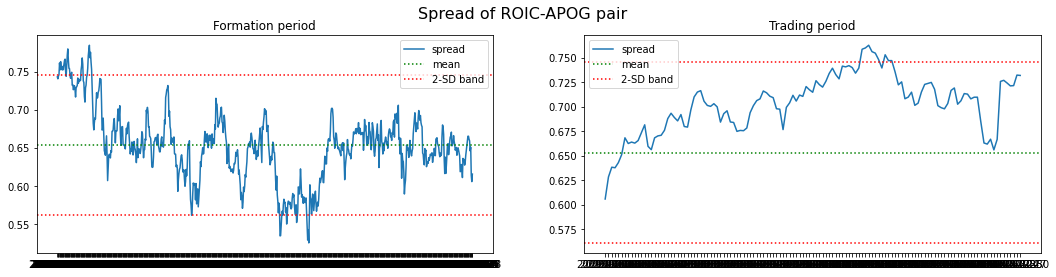

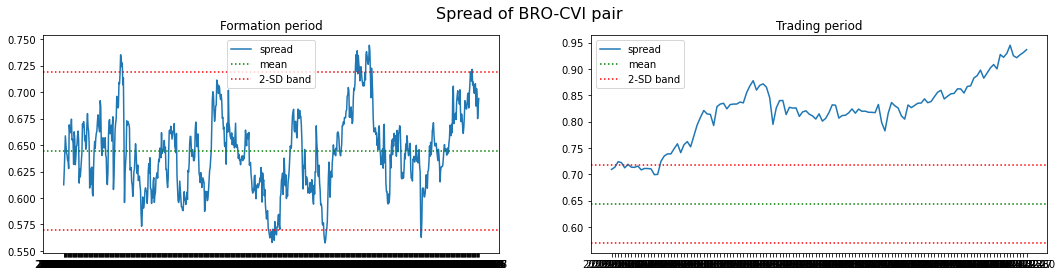

In [30]:
plot_pairs(top5_crossings, train36_6, test36_6)

In [31]:
calculate_metrics(top5_crossings, test36_6, pairs36_6)

,Euclidean distance,CADF p-value,ADF p-value,Spread SD,Pearson r,Num zero-crossings,Hurst Exponent,Half-life of mean reversion,% days within historical 2-SD band
VAC-PCH,9.860552,0.214763,0.059741,0.078565,0.901688,9,0.35413,5.653276,100.0
BXS-SHO,0.435095,0.018264,0.169415,0.045937,0.875581,6,0.398711,8.708147,81.102362
MDU-BRKL,7.356311,0.092516,0.095799,0.028773,0.790958,1,0.613059,11.70422,18.897638
ROIC-APOG,7.931587,0.207549,0.041517,0.045977,0.042976,1,0.558398,6.929416,92.913386
BRO-CVI,9.266735,0.835838,0.881626,0.037188,-0.36566,0,0.635295,30.10555,9.448819


## Highest Pearson r

In [32]:
pairs36_6.sort_values(by='Pearson r', ascending=False)

,Euclidean distance,Num zero-crossings,Pearson r,Spread mean,Spread SD,Hurst Exponent,Half-life of mean reversion,Hedge ratio
OGS-ATO,2.120809,74.0,0.987945,-0.074458,0.020923,0.411639,16.824540,1.098782
KIM-BRX,8.001497,56.0,0.986957,-0.290323,0.029193,0.399161,11.839873,1.191272
MTG-ESNT,1.418585,94.0,0.979970,0.032455,0.040310,0.357744,14.256815,1.055601
BRO-CVI,17.702676,95.0,0.978097,0.644480,0.037188,0.314274,11.577108,0.387476
HFC-PBF,3.514490,57.0,0.976089,-0.090763,0.090543,0.386047,17.247496,1.320731
...,...,...,...,...,...,...,...,...
TMP-BFS,34.700671,67.0,0.014751,1.263240,0.074008,0.479726,20.675334,0.014135
TMP-RCII,35.007944,73.0,0.009673,1.274464,0.074012,0.479446,20.585408,0.002422
TMP-USM,34.938826,75.0,0.009292,1.271939,0.074013,0.479021,20.623887,0.004858
TMP-FL,35.013408,69.0,0.007151,1.274663,0.074014,0.478973,20.593800,0.002376


In [33]:
top5_pearson = list(pairs36_6.sort_values(by='Pearson r', ascending=False).index[:5])

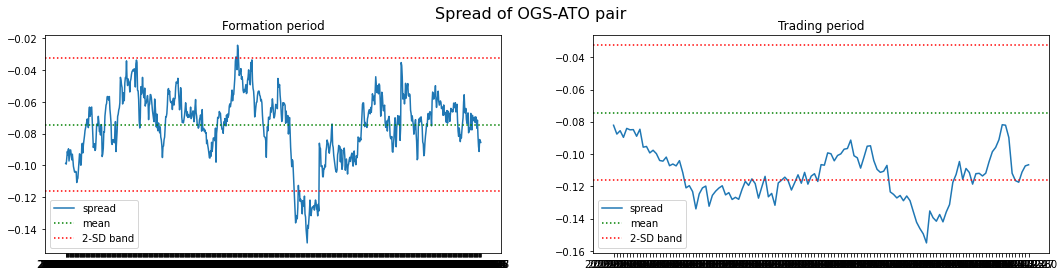

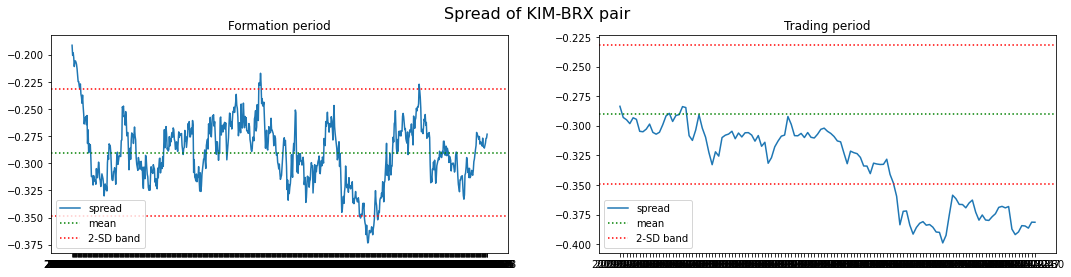

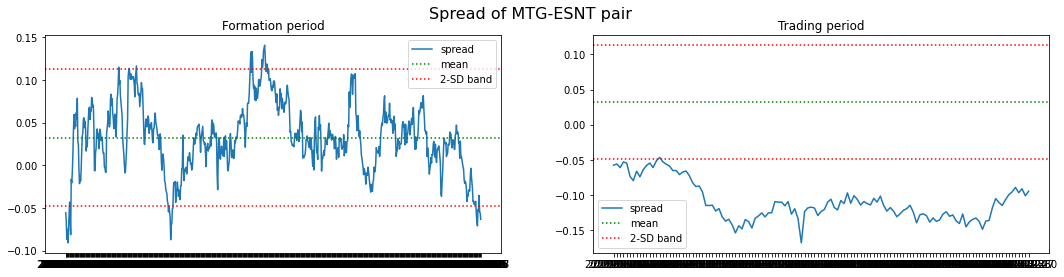

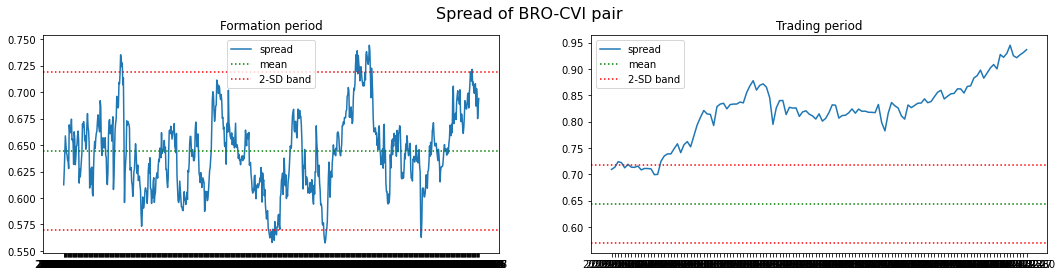

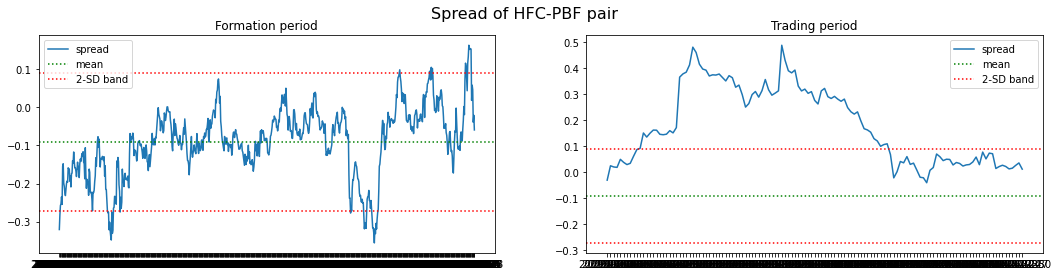

In [34]:
plot_pairs(top5_pearson, train36_6, test36_6)

In [35]:
calculate_metrics(top5_pearson, test36_6, pairs36_6)

,Euclidean distance,CADF p-value,ADF p-value,Spread SD,Pearson r,Num zero-crossings,Hurst Exponent,Half-life of mean reversion,% days within historical 2-SD band
OGS-ATO,1.28414,0.222975,0.068583,0.020923,0.809072,0,0.481455,7.256653,55.905512
KIM-BRX,3.777499,0.549536,0.668693,0.029193,0.9706,5,0.583508,30.487118,66.141732
MTG-ESNT,1.271775,0.583281,0.209027,0.04031,0.905006,0,0.512803,9.329682,0.787402
BRO-CVI,9.266735,0.835838,0.881626,0.037188,-0.36566,0,0.635295,30.10555,9.448819
HFC-PBF,2.623461,0.271825,0.54763,0.090543,0.616887,0,0.53262,22.374324,40.15748
